# Lending Club Loan Payback Classification - Exploratory Analysis

## What data are we looking at?
- Thousands of loans made through a lending club platform.
- All loans are not created equally.
- Someone who is sure to pay back will get a loan easier (at low interest) vs someone who appears riskier.
- Those who are very risky may not get a loan offer at all.

#### It is important to keep that last part in mind, since this data set only represents loans actually made, 
**i.e. do not mistake this data for loan applications.**

In this demo - we will analyze the dataset and preprocess it based on our requirements defined by our 'business understanding'

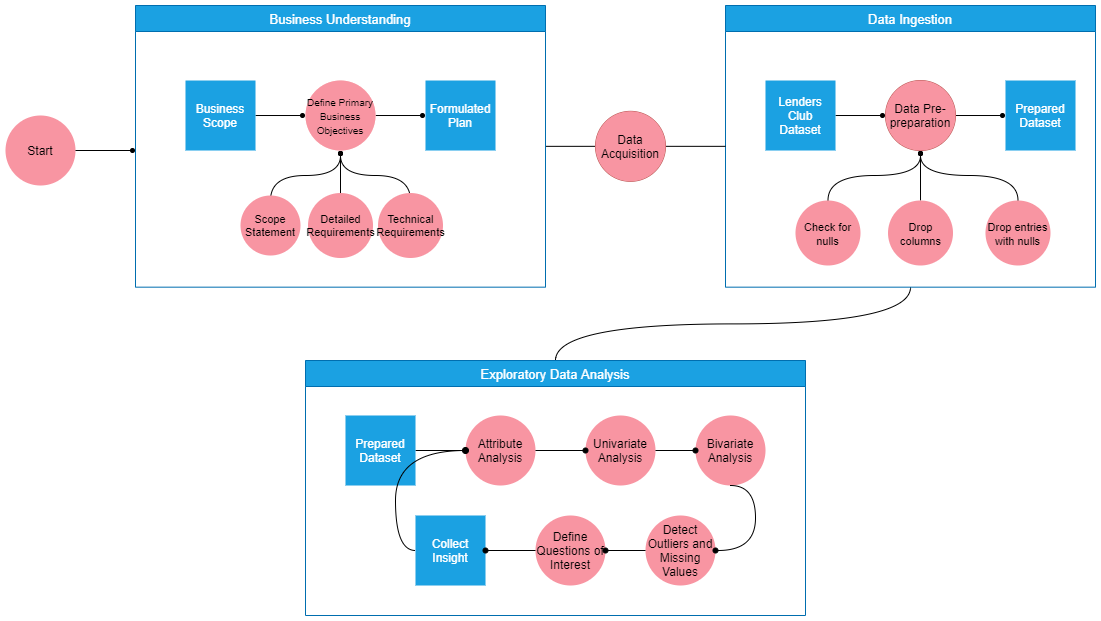

### Business Understanding
- Business understanding is inclined to understanding the business problem and domain.
- Then we define a scope statement.

#### In this use case, "We would like to build a classifier to ascertain  whether a customer will be able to repay the loan along with the interest amount."

- We define the detailed and technical requirements of the scope statement, specifically the type of data we will require and the specific methods we will actually apply.

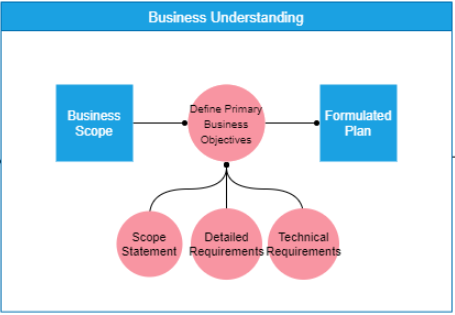

### Data Acquisition and Preparation

In a business environment, your data will exist in multiple various locations:
- SQL databases
- Data lakes 
- Data warehouses 
- Excel spreadsheets 
- Sometimes if you're lucky - in scanned PDF form. 

The data acquisition phase along with preprocessing - as mentioned earlier - usually takes up the bulk of the time because it may exist in: 
- Different forms
- Be recieved at different rates
- Or in large volumes. 

#### Most importantly, we may have some dirty data that needs to be cleaned.

Lucky in this case, we've made use of a simple publicly available CSV file - loan data from a Lending Club - the data is relatively clean (but we had to still tidy it up a bit more).

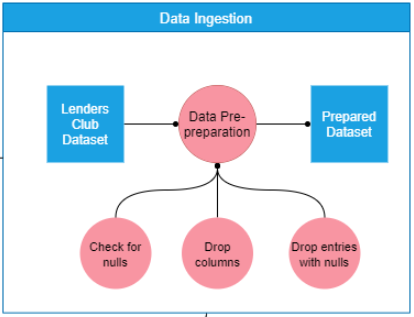

In [ ]:
# Loading important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Snapshot of the dirty data

In [ ]:
# Loading the raw loan stats dataset
df = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [ ]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)

df.head(3)

In [ ]:
# Size of the dataset
df.shape

This dataset contains 42538 rows and 144 columns. Out of these 144 columns, many columns have null values in majority.

### Data Preprocessing

These steps include:
- Our checks for nulls (and drop those columns)
- High cardinality checks (and drop columns)
- Removal of null rows.
- Outlier detection.

##### How many null values do we actually have?

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
# Total percentage of null values in the data
round((df.isnull().sum().sum())/(df.shape[0]*df.shape[1]),5)*100

In fact, 63.15% of the values in the overall data are null values. So, it is very important to carefully deal with these null values as they can significantly affect our results.

Most of the columns are float but there are some categorical columns stored as objects. We will look into this issue in the subsequent steps after deciding upon the final columns to consider in the final dataframe .

The next diagram is a heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions

# A HEATMAP IS ......

In [ ]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

### Handling Null Values

Handling null values is an important task here. From the heatmap above, we can see that a large amount of the dataset are actually null values. In the below code, you can see that there are only 53 columns out of 144 columns that have null values less than 40 percent.

In [ ]:
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a.plot(x='Percentage of null values',y='No.of columns',kind='bar',ylim=(50,55))

In [ ]:
# Considering only those columns which have null values less than 40% in that particular column
df = pd.read_csv('LoanStats3a.csv')
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

By considering columns with less number of null values, we were able to decrease total number of columns from 144 to 53.

### Shapshot post null treatment

In [ ]:
df.head(3)

In [ ]:
# Checking info of updated dataframe
df.info()

There are still some columns like emp_title and desc which have lot of null values. In the following steps, we will look into other columns as well to check for their importance and then decide on whether to include them in the final dataframe. 

## Understanding Features

It is important to understand the features/columns as some of the categorical columns present in the data are in the form of numerical values and vice-versa. We first tried to examine every column but later understood that it will be quite cumbersome to perform these operations to all 53 columns. So, we decided to first eliminate columns which doesn’t add value to the data and then analyze each field.

In [ ]:
df.emp_title.value_counts() #maybe make word clouds 

'emp_title' feature has many unique values in it and it doesn't add any information for our questions. It's better to drop this column due to the high cardinality.

### Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.


In [ ]:
# Checking columns that are of dtype 'object'
df.columns[df.dtypes == 'object']

In [ ]:
# Instead of checking every column of 53 columns like above, here we are running a for loop on top of 'object' columns and take a decison based on the output of this cell.
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('************************')
    break

In [ ]:
df[df.columns[df.dtypes == 'object']].nunique().plot.bar()

#### Feature processing considerations

- High-cardinality refers to columns with values that are very uncommon or unique. High-cardinality column values are typically identification numbers, email addresses, or user names. An example of a data table column with high-cardinality would be a USERS table with a column named USER_ID
- Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset. They can also occur where as "Quasi Constant" where one value holds the majority of the records. (extremely imbalanced)

#### Reasoning for dropping some columns 

- emp_title - high cardinality in employee title.
- payment_plan - is a constant value.
- desc - High cardinality. Requires some form of text analytics (out of scope/homework).
- title - High cardinality. Requires some form of text analytics.
- zip_code - Requires geospatial analytics.
- addr_state - Requires geospatial analytics.
- initial_list_status - is a constant value.
- application_type - is a constant value.
- hardship_flag - is a constant value.
- debt_settlement_flag - extremely imbalanced: N - 42375 and Y- 160

In [ ]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.

df.drop(['emp_title','pymnt_plan','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type','hardship_flag','debt_settlement_flag'],axis=1,inplace=True)

In [ ]:
# Similarly, checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

Since these numerical columns contain merely constant values, we resort to dropping them.

In [ ]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

df.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)

After dropping these columns, we double-check the heatmap of null values.

In [ ]:
# Checking for null values in the updated dataframe
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.shape
# We were able to decrease no.of columns from 53 to 36 and we will still try to decrease the no.of columns.

Our shape has now changed, since we have dropped some more columns: 53 --> 36 columns.

In [ ]:
# Checking two columns which are the same. 
df[df['out_prncp'] != df['out_prncp_inv']] # Both are same 

In [ ]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b = b.sort_values(by=['Percentage of null values'],ascending=False)

b.plot(y='Percentage of null values',kind='bar')

In [ ]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=False)
plt.show()

In [ ]:
# Dropping those columns to avoid multi-collinearity
df.drop('out_prncp_inv',axis=1,inplace = True)
df.drop('out_prncp',axis=1,inplace = True)

In [ ]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=False)
plt.show()

We can see some columns having high correlation but we aren't dropping these columns as yet. These columns might not be even considered while solving our particular question. We will investigate the implications of these columns later - bear in mind that we should not merely drop all attributes that display multicollinearity and in some cases we may actually make use of them as input variables.

In [ ]:
# Now that we have come to a conclusion on which columns to consider in the final data frame, we can drop rows which have only null values.
df.dropna(how='all',inplace=True) 
# Dropping rows which have only null values in all the columns

In [ ]:
# Checking the final shape of the dataframe
df.shape

In [ ]:
# Checking if still there are any null values
df.isnull().sum().plot.bar()

##### There are still few null values which we will deal in the end after pre-processing few more numerical columns.

## Converting categorical columns to date columns

The columns [‘issue_d’,’last_pymnt_d’,’last_credit_pull_d’] which are datetime columns are further divided into month and year by using pandas datetime module. The new columns are named as ‘issue_d_year’, ‘issue_d_month’, ‘last_pymnt_d_year’, ‘last_pymnt_d_month’, ‘last_credit_pull_d_year’, ‘last_credit_pull_d_month’ respectively.

In [ ]:
# The next step is to convert categorical columns and date-time columns to numerical columns
# Checking 5 point summary
df.describe()

## Converting date columns to numerical columns

The columns [‘issue_d’,’last_pymnt_d’,’last_credit_pull_d’] which are datetime columns are further divided into month and year by using pandas datetime module. The new columns are named as ‘issue_d_year’, ‘issue_d_month’, ‘last_pymnt_d_year’, ‘last_pymnt_d_month’, ‘last_credit_pull_d_year’, ‘last_credit_pull_d_month’ respectively.

In [ ]:
# Converting objects to datetime columns
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].astype('str'), format='%b-%y', yearfirst=False)

In [ ]:
# Checking the new datetime columns
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

In [ ]:
# Considering only year of joining for 'earliest_cr_line' column.
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year  

In [ ]:
# Adding new features by getting month and year from issue_d,last_pymnt_d and last_credit_pull_d columns
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

df.earliest_cr_line = 2019 - (df.earliest_cr_line)
df.issue_d_year = 2019 - (df.issue_d_year)

df.last_pymnt_d_year = 2019 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2019 - (df.last_credit_pull_d_year)

In [ ]:
# Dropping the original features to avoid data redundancy
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

## Converting categorical to numerical columns

The columns int_rate and term are stored as objects. We have performed necessary string operations to convert them into numerical columns.

In [ ]:
# Considering 'term' feature
df.term.value_counts()

There are only two values 'term' column can take. Clearly, it is a categorical feature. Since, the value it takes is ordinal(i., no.of months), we can consider label encoding it rather than one hot encoding.

For interest's sake:
Label Encoding - This approach is very simple and it involves converting each value in a column to a number.

![LabelEncoding](https://miro.medium.com/max/772/1*Yp6r7m82IoSnnZDPpDpYNw.png "Label Encoding")

One-hot encoding - We convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

![HotEncoding](https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png "One Hot Encoding")

### Understanding grade.

Grade associated with the loan. For more information: https://www.lendingclub.com/foliofn/rateDetail.action

In [ ]:
# Considering 'grade' feature
df.grade.value_counts().plot.bar()

In [ ]:
# Considering 'sub_grade' feature
df.sub_grade.value_counts().plot.bar()

Both grade and sub_grade features are categorical feature. We can perform label encoding on top of these features.

In [ ]:
# Converting term and int_rate to numerical columns
df.term = df.term.apply(lambda x:x[:2])
df.term = df.term.astype('float')
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [ ]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['home_ownership','verification_status','purpose'],drop_first = True)

In [ ]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
le.classes_

In [ ]:
df.grade = le.transform(df.grade)
df.grade

In [ ]:
order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(7,8))

plt.subplot(111)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df, 
                   palette="hls", order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


In [ ]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.sub_grade)
le.classes_

In [ ]:
df.sub_grade = le.transform(df.sub_grade)

In [ ]:
# Checking for null values in the updated dataframe
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.isnull())
plt.show()

## Checking correlation: 
Now that we have converted all the columns to numerical columns, we will check for correlation.

In [ ]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr())
plt.show()

## Dealing with null values:
We check for the left-over null values and deal with these respectively.

In [ ]:
# Checking for null values
# Percentage of null values
print('Percentage of null values:')
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b = b.sort_values(by=['Percentage of null values'],ascending=False)
b.plot(y='Percentage of null values',kind='bar')

There are only two columns whose percentage of null values is greater than 2.0%.

# Print only null rows for 4 columns

In [ ]:
# Dropping the 29 rows which have null values in 4 columns
print(df[df['delinq_2yrs'].isnull()]
#       ['pub_rec_bankruptcies']
     )
df = df[df['delinq_2yrs'].notnull()]

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum().plot.bar()

# BAR GRAPH 

Some columns have a very little percentage of null values(less than 1%). There we can replace the null values with the median of their respective columns.

In [ ]:
# As the null values in these columns are less than 0.5% of the size, we are simply imputing null values with median.
# mean vs mediian: mean more senstive is more sensitive to outliers AND MODE IS USED MORE FOR Categorical columns 
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(),inplace=True)
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].median(),inplace=True)
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(),inplace=True)
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].median(),inplace=True)

In [ ]:
# Filling null values with median(string) which is close to 50.
# percentage of money used iin day to daya expenses 
df.revol_util.fillna('50%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

In [ ]:
df.pub_rec_bankruptcies.value_counts().plot.bar()

In [ ]:
# pub_rec_bankruptcies column is highly imbalanced.
#So, it is better to fill it with median(0) as even after building model the model will be skewed very much towards 0.
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

In [ ]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

In [ ]:
df.head()

In [ ]:
# Building models to fill null values in emp_length columns
df2 = df.drop('loan_status',axis=1)
df2_train = df2[df2['emp_length'] !=50]
df2_test = df2[df2['emp_length'] ==50]

For columns that have a high percentage of null values, we will run a model on top of non-null values and predict the missing values in that respective column.

In [ ]:
# Assigning train and test to variables
x_train = df2_train.drop('emp_length',axis=1)
y_train = df2_train.emp_length
x_test = df2_test.drop('emp_length',axis=1)

In [ ]:
df2_train.drop('emp_length',axis=1)

In [ ]:
# We are running a decision tree classifier to predict the missing values in 'emp_length' column
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(df2_train.drop('emp_length',axis=1), y_train)
giniPred = giniDecisionTree.predict(x_test)


In [ ]:
# Predicted 'emp_length'
giniPred

In [ ]:
# Replacing the randomly fed value with predicted values
df.emp_length.replace({50:giniPred},inplace=True)

In [ ]:
df.head()

In [ ]:
# Last check to find if there are any null values
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])*100

In [ ]:
# Heatmap of correlation of the final dataframe
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style('whitegrid')

sns.heatmap(df.corr())
plt.show()

In [ ]:
df.head()

In [ ]:
df.shape

## Exploratory Data Analysis

What are some key findings around the loan amount?

In [ ]:
### show distributions 

# loan amount vs income plot

# pandas profliing 
from pandas_profiling import ProfileReport
# outlier treatments 
profile = ProfileReport(df)
sns.boxplot(y='loan_amnt', x='loan_status',data=df)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [ ]:
df.plot.scatter('loan_amnt', 'annual_inc')

In [ ]:
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_matrix(df)
# fig.show()

# Do Outliers Exist?
In most cases yes - and they may be univariate or multivariate in nature. 

A simple univariate example is to perhaps find an individual with an income of 70 million dollars per annum requesting a loan from the lenders club. 

Another more complex example (multivariate) could exist where someone's employee title does not match their income, like a financial manager stating that he earns 700 dollars per annum.

[Some more info,listed here](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html#:~:text=In%20this%20article%2C%20we%20have,need%20to%20try%20them%20all.)

In [ ]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
sns.boxplot(y='annual_inc',data=df)
annual_inc_q = df["annual_inc"].quantile(0.99)
df = df[df["annual_inc"] < annual_inc_q]

In [ ]:
sns.boxplot(y='annual_inc',data=df)

In [ ]:
# Storing the final dataframe into a csv file 
df.to_csv('pre_processed.csv',index=False)

In [ ]:
profile.to_file("./Loan_data.html")

We can now move on to building a machine learning model in our next forum.